# A short tutorial about Fuzzy Time Series
Prof. Msc. Petrônio Cândido L. Silva

[pyFTS - Fuzzy Time Series for Python](http://pyfts.github.io/pyFTS/)

[MINDS - Machine Intelligence and Data Science Lab  ](http://www.minds.eng.ufmg.br/)



<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/PYFTS/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>


## Install pyFTS library

In [0]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-a7rabuel
  Stored in directory: /tmp/pip-ephem-wheel-cache-ebhoqbdc/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS


## Other common imports

In [0]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data loading

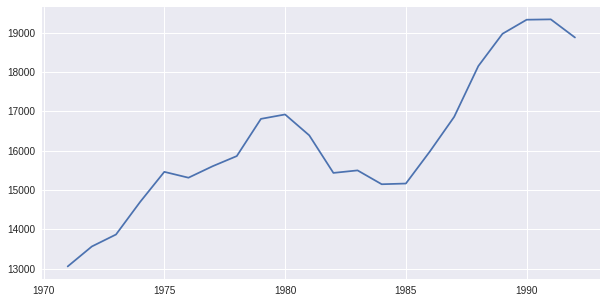

In [0]:
from pyFTS.data import Enrollments

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

df = Enrollments.get_dataframe()
plot(df['Year'],df['Enrollments'])

data = df['Enrollments'].values

## Training procedure

### Definition of the Universe of Discourse U & Linguistic variable creation

The Universe of Discourse (U) partitioners are responsible for identifying U, split the partitions and create their fuzzy sets. There are several ways to partition U and this has a direct impact on the accuracy of the predictive model.

For this example we are using grid partitioning, where all sets are equal. The default membership function is triangular.

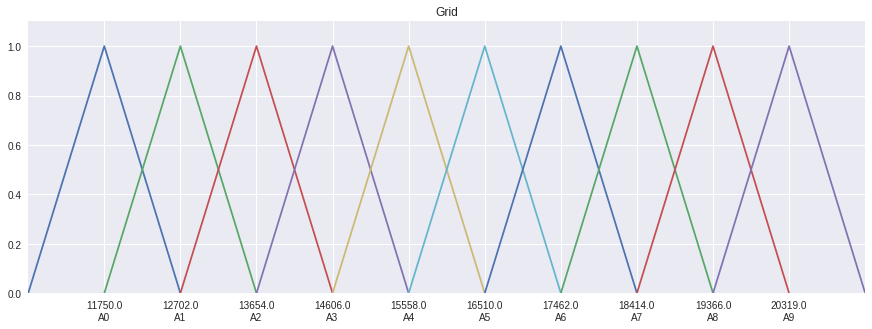

In [0]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

### Fuzzyfication

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [0]:

fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A1',
 'A2',
 'A2',
 'A3',
 'A4',
 'A4',
 'A4',
 'A4',
 'A5',
 'A5',
 'A5',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A5',
 'A7',
 'A8',
 'A8',
 'A8',
 'A7']

### Temporal patterns

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [0]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A1 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A4', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A4', 'A5 -> A7', 'A7 -> A8', 'A8 -> A8', 'A8 -> A7']


### Rule generation

In [0]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A1 -> A2
A2 -> A2,A3
A3 -> A4
A4 -> A4,A5
A5 -> A4,A5,A7
A8 -> A7,A8
A7 -> A8



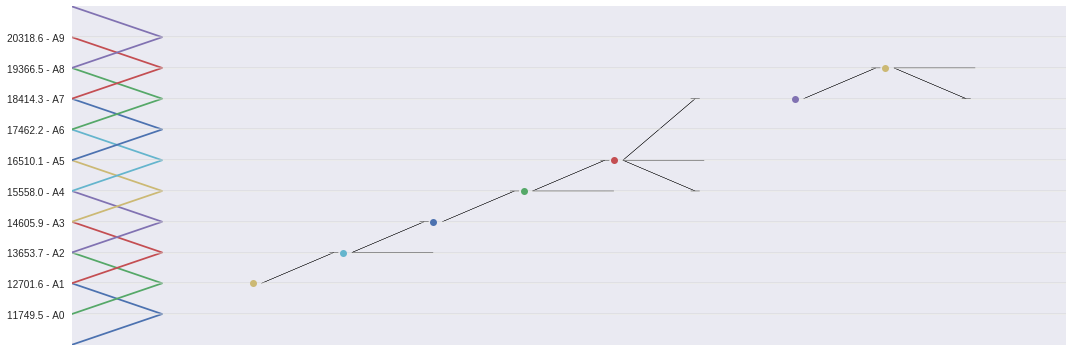

In [0]:
from pyFTS.common import Util

Util.plot_rules(model, size=[15,5] , rules_by_axis=10)

##  Forecasting procedure

### Input value fuzzyfication

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [0]:
fuzzyfied = fs.fuzzyfy(18876, method='maximum', mode='sets')

print(fuzzyfied)

A7


### Find the compatible rules & Defuzzyfy

In [0]:
model.predict([18876])

[19366.460000000006]

## Model's in sample performance 

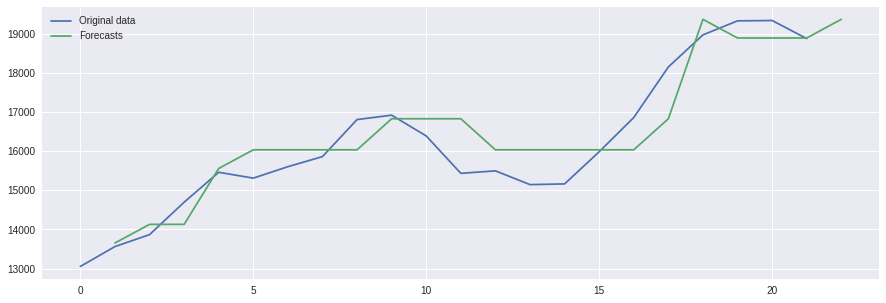

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

## General Process

Conventional FTS:
A1 -> A2
A2 -> A2,A3
A3 -> A4
A4 -> A4,A5
A5 -> A4,A5,A7
A8 -> A7,A8
A7 -> A8



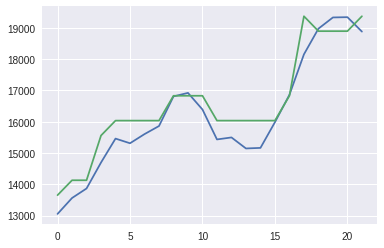

In [0]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

train = Enrollments.get_data()

test = Enrollments.get_data()

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=10)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot 
plot(test)
plot(forecasts)